In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

application_train.csv: includes datas and features for all loan applications used as training set 

application_test.csv: includes datas and features (like application_train.csv except 'TARGET') for all loan applications but used as test set

In [4]:
# Refer :- https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
# Load the training set
app_train = reduce_memory_usage(pd.read_csv('../input/home-credit-default-risk/application_train.csv'))
app_train.head(10)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Load the test set
app_test = reduce_memory_usage(pd.read_csv("../input/home-credit-default-risk/application_test.csv"))
app_test.head(10)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
# Overview of training set
print(f"Size of training set: {app_train.shape} \n")

Size of training set: (307511, 122) 



In [9]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float16(61), float32(4), int16(2), int32(2), int8(37), object(16)
memory usage: 92.4+ MB


In [11]:
# Overview of test set
print(f"Size of test set: {app_test.shape} \n")

Size of test set: (48744, 121) 



In [12]:
app_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [13]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float16(61), float32(4), int16(2), int32(2), int8(36), object(16)
memory usage: 14.6+ MB


# Structure Investigation

In [14]:
app_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.921875,237123.140625,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.937500,402490.781250,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,NaN,0.000000,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,NaN,NaN,0.0,0.0,0.0,0.0,261.0


In [15]:
# Check duplication
app_train.duplicated().sum()

0

In [16]:
# Computes feature correlation
df_corr = app_train.corr(method= "pearson").abs()
df_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000850,0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,0.002108,1.000000,0.019187,0.003982,0.030369,0.012817,0.039645,0.037231,0.078239,0.044932,...,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,0.001827,0.025564,0.330938,0.239818,...,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,0.001820,0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074799,0.027261,0.064223,...,0.003130,0.002408,0.000242,0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.000343,0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099746,0.055436,0.066838,...,0.034329,0.021082,0.031023,0.016148,0.003906,0.004238,0.001275,0.054451,0.015925,0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.002193,0.002704,0.000366,0.002944,0.004238,0.002185,0.004677,0.001400,0.002255,0.000472,...,0.013281,0.001126,0.000120,0.001130,0.230374,1.000000,0.217412,0.005258,0.004416,0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,0.002436,0.002387,0.001275,0.013881,0.001007,0.002149,0.001336,0.003072,...,0.004640,0.001275,0.001770,0.000081,0.004706,0.217412,1.000000,0.014096,0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,0.012462,0.010808,0.024700,0.054451,0.039148,0.056422,0.078610,0.001372,0.034457,...,0.001565,0.002729,0.001285,0.003612,0.000018,0.005258,0.014096,1.000000,0.007789,0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,0.002022,0.007836,0.004859,0.015925,0.010124,0.016432,0.001278,0.011799,0.015345,...,0.005125,0.001575,0.001010,0.002004,0.002716,0.004416,0.015115,0.007789,1.000000,0.076208


<AxesSubplot:>

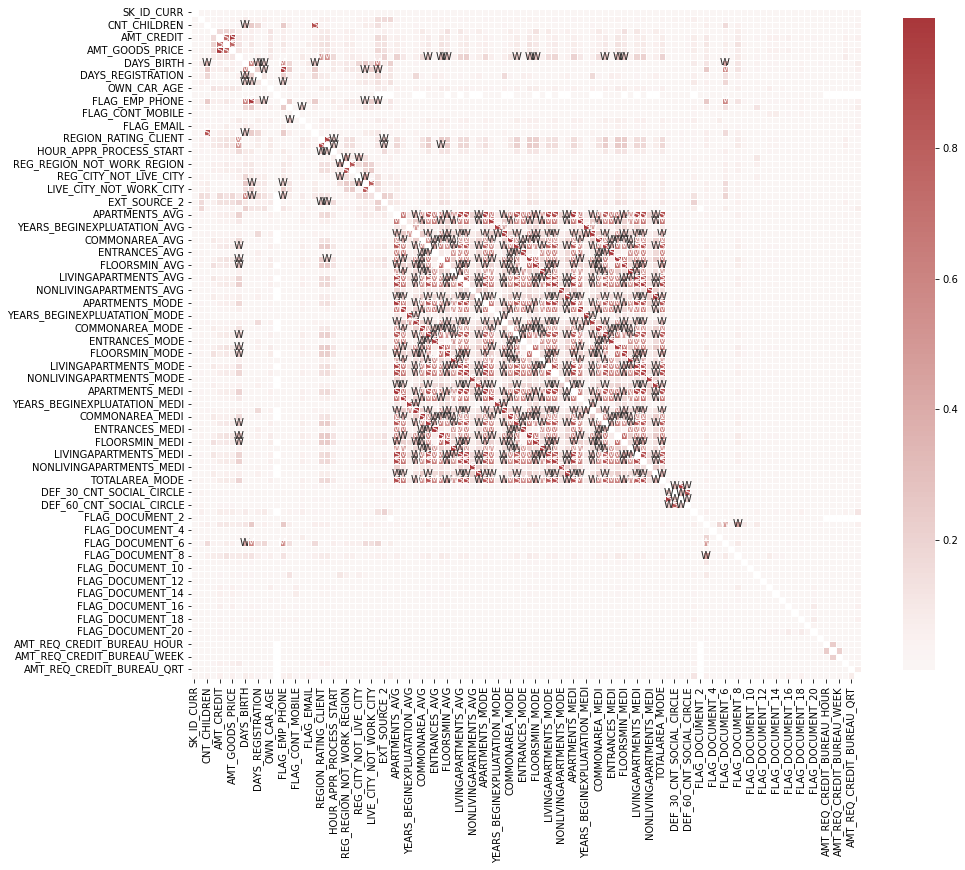

In [17]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)> 0.75, "S",
                  np.where(np.abs(df_corr)> 0.5, "M",
                  np.where(np.abs(df_corr)> 0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask= np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [18]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values(ascending= False)
df_corr_stacked = pd.DataFrame(df_corr_stacked)
df_corr_stacked

,,0
FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999755
YEARS_BUILD_MEDI,YEARS_BUILD_AVG,0.998492
OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998490
FLOORSMIN_MEDI,FLOORSMIN_AVG,0.997240
FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997035
...,...,...
AMT_REQ_CREDIT_BUREAU_QRT,ENTRANCES_MEDI,0.000008
FLAG_DOCUMENT_4,YEARS_BEGINEXPLUATATION_AVG,0.000006
FLAG_DOCUMENT_12,FLAG_MOBIL,0.000005
FLAG_DOCUMENT_4,YEARS_BEGINEXPLUATATION_MODE,0.000004


In [19]:
# Drop features that have high correlations with others
df_corr_stacked.reset_index(inplace= True)
df_corr_stacked = df_corr_stacked.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0 : 'Corr'})
cols = list(df_corr_stacked[df_corr_stacked['Corr'] > 0.75]['Feature 1'].values)
reduced_app_train = app_train.drop(cols, axis = 1)

In [20]:
# Check missing values
missing_val_total = reduced_app_train.isnull().sum().sort_values(ascending= False)
missing_val_percent = (100 * reduced_app_train.isnull().sum() / reduced_app_train.shape[0]).round(1).sort_values(ascending= False)
missing_val_data = pd.concat([missing_val_total, missing_val_percent], axis= 1, keys=['Total', 'Percent'])
missing_val_data = missing_val_data[missing_val_data.iloc[:, 1] != 0]
missing_val_data

,Total,Percent
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2


In [21]:
cols_with_missing_to_reduce = [col for col in missing_val_data.index if missing_val_data.loc[col, "Percent"] > 60]
reduced_app_train = reduced_app_train.drop(cols_with_missing_to_reduce, axis= 1).reset_index(drop= True)

In [22]:
reduced_app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'LANDAREA_AVG', 'NONLIVINGAREA_AVG', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', '

In [23]:
def fix_nulls(data):
    data['NAME_FAMILY_STATUS'].fillna('Data_Not_Available', inplace=True)
    data['NAME_HOUSING_TYPE'].fillna('Data_Not_Available', inplace=True)
    data['FLAG_MOBIL'].fillna('Data_Not_Available', inplace=True)
    data['FLAG_CONT_MOBILE'].fillna('Data_Not_Available', inplace=True)
    data['FLAG_EMAIL'].fillna('Data_Not_Available', inplace=True)
    data['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)
    data.replace(max(data['DAYS_EMPLOYED'].values), np.nan, inplace=True)
    data['CODE_GENDER'].replace('XNA','M',inplace=True)
    data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
    data['EXT_SOURCE_1'].fillna(0, inplace=True)
    data['EXT_SOURCE_2'].fillna(0, inplace=True)
    data['EXT_SOURCE_3'].fillna(0, inplace=True)
    return data.head()

**Structure of categorical features**

In [24]:
reduced_app_train.select_dtypes(exclude= "number").head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN


In [25]:
reduced_app_train.describe(exclude= "number")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,150503,66040,159428


From the above describing table, we can obtain some information such as whether a categorical variable has missing values depends on the total count, the number of unique values, which frequency the most prominent value is present
For example: 'NAME_CONTRACT_TYPE' has no missing value, 2 unique values and the most value is Cash loans

**Structure of numerical features**

In [26]:
unique_val = app_train.select_dtypes(include= "number").nunique().sort_values()

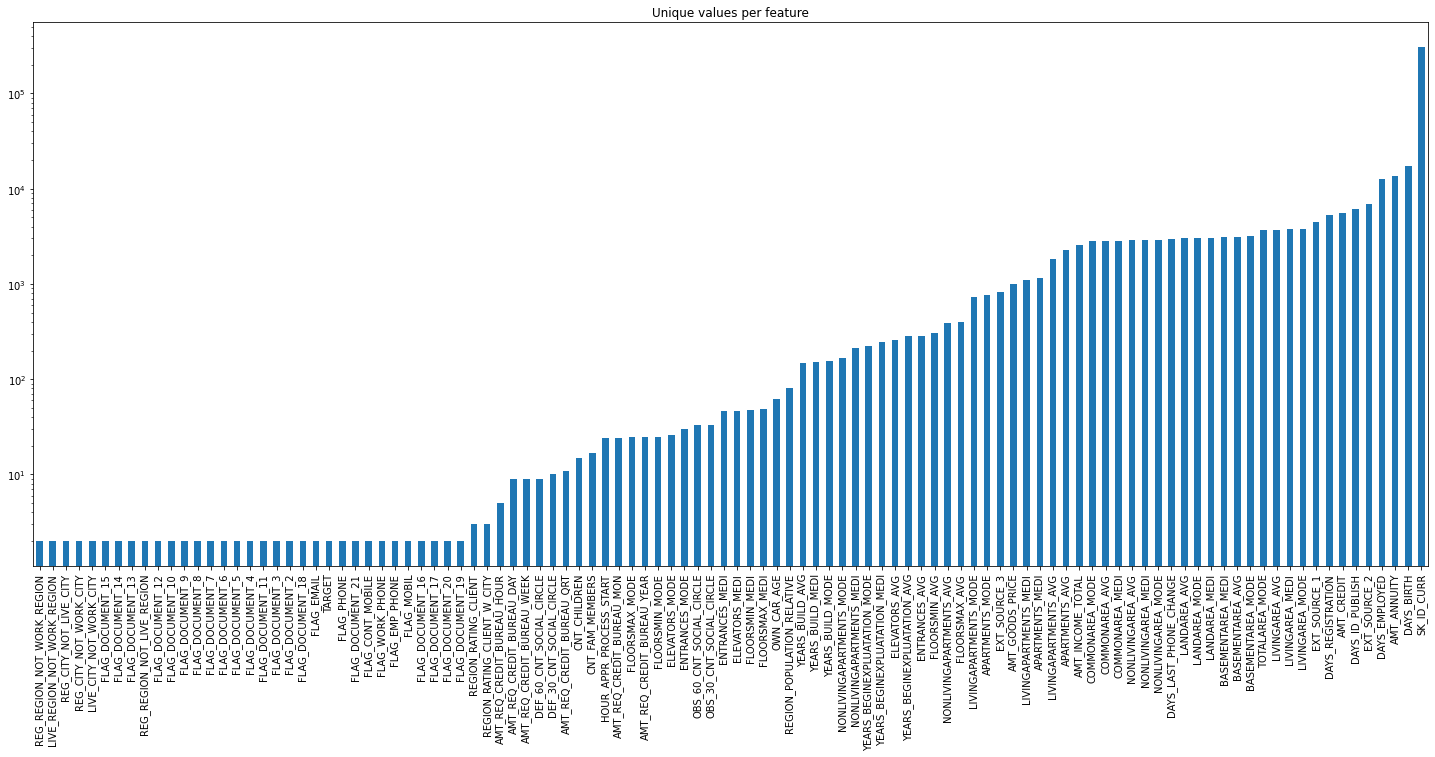

In [27]:
unique_val.plot.bar(logy=True, figsize=(25, 10), title="Unique values per feature");

**Univariate Analysis : Name_Contract_Type**

,NAME_CONTRACT_TYPE,TARGET,Total,Avg
0,Cash loans,23221,278232,0.083459
1,Revolving loans,1604,29279,0.054783


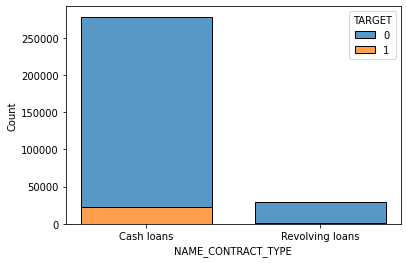

In [29]:
temp = pd.DataFrame(reduced_app_train.groupby("NAME_CONTRACT_TYPE")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("NAME_CONTRACT_TYPE")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("NAME_CONTRACT_TYPE")["TARGET"].agg(Avg='mean')).reset_index()['Avg']

sns.histplot(reduced_app_train, x= "NAME_CONTRACT_TYPE", hue= "TARGET", multiple= "stack", shrink= 0.75)
temp

Most of the people are taking loans in the form of cash loans instead of revolving loans such as credit cards.
The percantage of repaying the loan of 2 types are nearly the same

**Univariate Analysis : Code_Gender**

,CODE_GENDER,TARGET,Total,Avg
0,F,14170,202448,0.069993
1,M,10655,105059,0.101419
2,XNA,0,4,0.000000


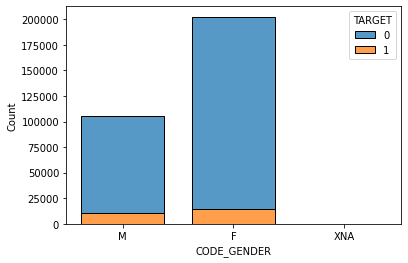

In [30]:
sns.histplot(reduced_app_train, x= "CODE_GENDER", hue= "TARGET", multiple= "stack", shrink= 0.75)
temp = pd.DataFrame(reduced_app_train.groupby("CODE_GENDER")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("CODE_GENDER")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("CODE_GENDER")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

Women took much more number of loans as compared to Men : Whereas Women took a total of 202K+ loans, Men only took 105K+ loans.
However, at the same time, Men are slightly more capable of repaying the loan as compared to Women. Whereas Men are able to repay their loans in 10% of the cases, Women are only able to repay in 7% of the cases.
There are 4 entries where Gender=’XNA’. Since this is not providing us with much information, we can remove these entries later on.

**Univariate Analysis : Flag_Own_Car**

,FLAG_OWN_CAR,TARGET,Total,Avg
0,N,17249,202924,0.085002
1,Y,7576,104587,0.072437


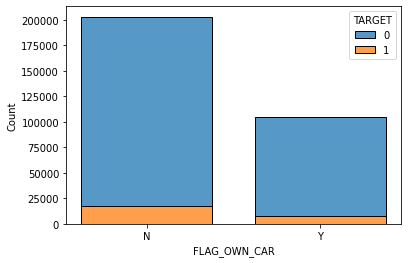

In [31]:
sns.histplot(reduced_app_train, x= "FLAG_OWN_CAR", hue= "TARGET", multiple= "stack", shrink= 0.75)
temp = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_CAR")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_CAR")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_CAR")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

**Univariate Analysis : Flag_Own_Realty**

,FLAG_OWN_REALTY,TARGET,Total,Avg
0,N,7842,94199,0.083249
1,Y,16983,213312,0.079616


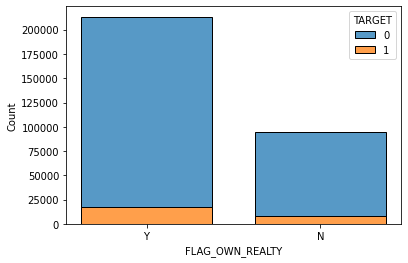

In [32]:
sns.histplot(reduced_app_train, x= "FLAG_OWN_REALTY", hue= "TARGET", multiple= "stack", shrink= 0.75)
temp = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_REALTY")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_REALTY")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("FLAG_OWN_REALTY")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

Most of the applicants for loans own a flat/house, which is a little surprising.
However, again, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). We can conclude that this feature is not very useful.

**Univariate Analysis : Cnt_Children**

,CNT_CHILDREN,TARGET,Total,Avg
0,0,16609,215371,0.077118
1,1,5454,61119,0.089236
2,2,2333,26749,0.087218
3,3,358,3717,0.096314
4,4,55,429,0.128205
5,5,7,84,0.083333
6,6,6,21,0.285714
7,7,0,7,0.000000
8,8,0,2,0.000000
9,9,2,2,1.000000


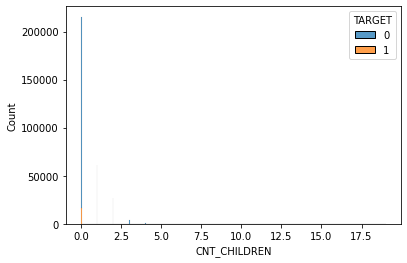

In [34]:
sns.histplot(reduced_app_train, x= "CNT_CHILDREN", hue= "TARGET", multiple= "stack")
temp = pd.DataFrame(reduced_app_train.groupby("CNT_CHILDREN")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("CNT_CHILDREN")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("CNT_CHILDREN")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

The applicants having no children take considerably higher number of loans.
However, again, there is not much difference in the loan repayment status for the customer based on this information. We can conclude that this feature is not very useful.

**Univariate Analysis : Amt_Credit**

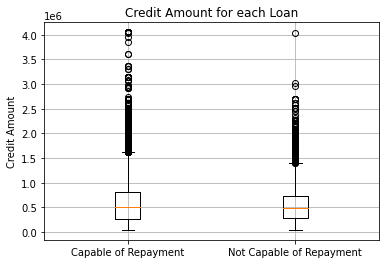

In [36]:
approved_loan_credit = reduced_app_train[reduced_app_train['TARGET']==0]['AMT_CREDIT'].values
rejected_loan_credit = reduced_app_train[reduced_app_train['TARGET']==1]['AMT_CREDIT'].values

plt.boxplot([approved_loan_credit, rejected_loan_credit])
plt.title('Credit Amount for each Loan')
plt.xticks([1,2],('Capable of Repayment','Not Capable of Repayment'))
plt.ylabel('Credit Amount')
plt.grid()

We can see from the Boxplot above that the Median Value of the Credit Amount of the Customers who are capable of loan repayment is slightly larger than the Median Value of Customers who are not capable of repayment.
This basically means that the customers with higher credit amount have a slightly higher chances of being capable of loan repayment than customers with lower credit amount.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


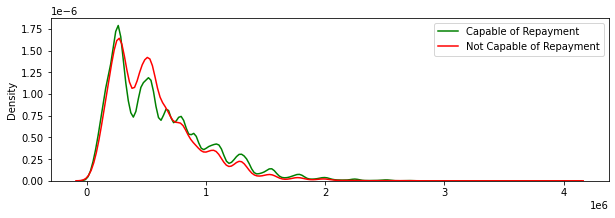

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_loan_credit,hist=False,label="Capable of Repayment", color='green')
sns.distplot(rejected_loan_credit,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()

**Univariate Analysis : Name_Type_Suite**

,NAME_TYPE_SUITE,TARGET,Total,Avg
0,Children,241,3267,0.073768
1,Family,3009,40149,0.074946
2,Group of people,23,271,0.084871
3,Other_A,76,866,0.087760
4,Other_B,174,1770,0.098305
5,"Spouse, partner",895,11370,0.078716
6,Unaccompanied,20337,248526,0.081830


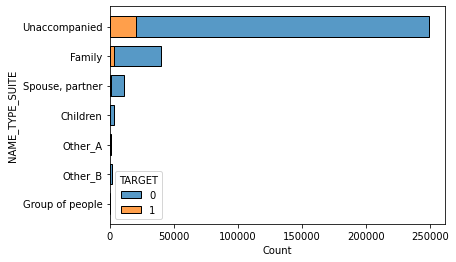

In [39]:
sns.histplot(reduced_app_train, y= "NAME_TYPE_SUITE", hue= "TARGET", multiple= "stack", shrink= 0.7)
temp = pd.DataFrame(reduced_app_train.groupby("NAME_TYPE_SUITE")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("NAME_TYPE_SUITE")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("NAME_TYPE_SUITE")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

For the various types of people accompanying the client for loan, the client comes unaccompanied to the bank in the most number of cases, out of which approx. 92% of the time, the bank finds the client to be capable of loan repayment whereas the remaining 8% of the time, the client is not capable of the same.
Both in capability and non capability, 'Unaccompanied' as a class is the majority class in this case.
The curve over here falls very sharply, which means that there is a lot of variability.

**Univariate Analysis : Name_Income_Type**

,NAME_INCOME_TYPE,TARGET,Total,Avg
0,Businessman,0,10,0.000000
1,Commercial associate,5360,71617,0.074843
2,Maternity leave,2,5,0.400000
3,Pensioner,2982,55362,0.053864
4,State servant,1249,21703,0.057550
5,Student,0,18,0.000000
6,Unemployed,8,22,0.363636
7,Working,15224,158774,0.095885


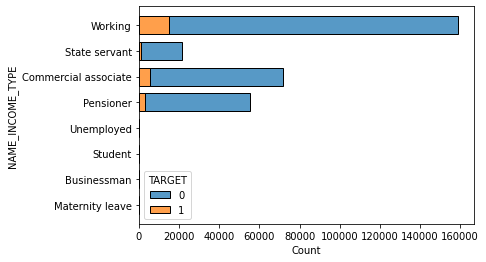

In [40]:
sns.histplot(reduced_app_train, y= "NAME_INCOME_TYPE", hue= "TARGET", multiple= "stack", shrink= 0.7)
temp = pd.DataFrame(reduced_app_train.groupby("NAME_INCOME_TYPE")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("NAME_INCOME_TYPE")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("NAME_INCOME_TYPE")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

The people who are working take the most number of loans whereas Commercial Associates, Pensioners and State Servants take considerably lesser number of loans.
We have very little datapoints related to Unemployed people, Students, Businessmen and women on Maternity leave. Again, there's a lot of variability in this scenario.
One interesting observation over here is the fact that whatever loans the students and businessmen have applied to, they have been deemed capable of repayment of the same.

**Univariate Analysis : Name_Family_Status**

,NAME_FAMILY_STATUS,TARGET,Total,Avg
0,Civil marriage,2961,29775,0.099446
1,Married,14850,196432,0.075599
2,Separated,1620,19770,0.081942
3,Single / not married,4457,45444,0.098077
4,Unknown,0,2,0.000000
5,Widow,937,16088,0.058242


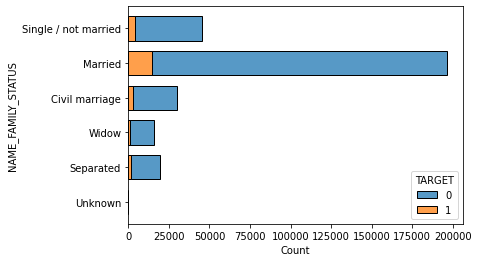

In [42]:
sns.histplot(reduced_app_train, y= "NAME_FAMILY_STATUS", hue= "TARGET", multiple= "stack", shrink= 0.7)
temp = pd.DataFrame(reduced_app_train.groupby("NAME_FAMILY_STATUS")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("NAME_FAMILY_STATUS")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("NAME_FAMILY_STATUS")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

There is variability among the Family Status of the applicants but there is not much variability if the majority class (Married) is ignored.
Married people apply for the most number of loans and the number of people deemed incapable of repayment is also the highest.

**Univariate Analysis : Name_Housing_Type**

,NAME_HOUSING_TYPE,TARGET,Total,Avg
0,Co-op apartment,89,1122,0.079323
1,House / apartment,21272,272868,0.077957
2,Municipal apartment,955,11183,0.085397
3,Office apartment,172,2617,0.065724
4,Rented apartment,601,4881,0.123131
5,With parents,1736,14840,0.116981


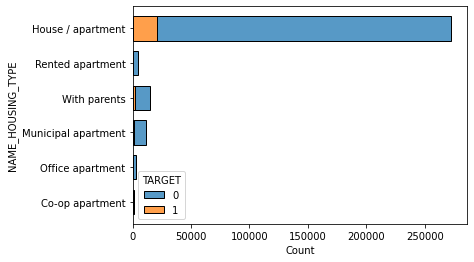

In [43]:
sns.histplot(reduced_app_train, y= "NAME_HOUSING_TYPE", hue= "TARGET", multiple= "stack", shrink= 0.7)

temp = pd.DataFrame(reduced_app_train.groupby("NAME_HOUSING_TYPE")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("NAME_HOUSING_TYPE")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("NAME_HOUSING_TYPE")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

People living in a House/Apartment apply for the most number of loans and the number of people deemed incapable of repayment in this case is also the highest, whereas if percentages are looked at, people living in rented apartment have the highest chance of default.

**Univariate Analysis : Days_Birth**

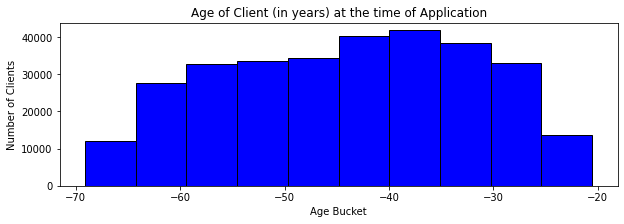

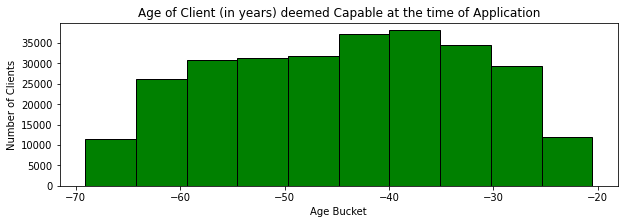

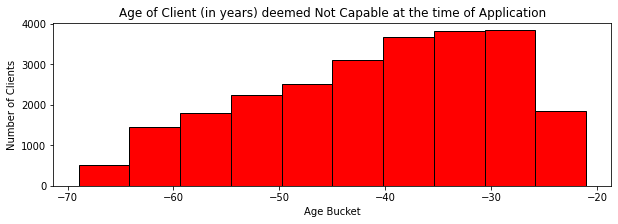

In [44]:
capable_days_birth = reduced_app_train[reduced_app_train['TARGET']==0]['DAYS_BIRTH'].values/365
not_capable_days_birth = reduced_app_train[reduced_app_train['TARGET']==1]['DAYS_BIRTH'].values/365

plt.figure(figsize=(10,3))
plt.hist(reduced_app_train['DAYS_BIRTH'].values/365, bins=10, edgecolor='black', color='blue')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

print("\n")
plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor='black', color='green')
plt.title('Age of Client (in years) deemed Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

print("\n")
plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='red')
plt.title('Age of Client (in years) deemed Not Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

Most number of people applying for loans are in the range of (35-40) years whereas this is followed by people in the range of (40-45) years whereas the number of applicants in people aged <25 or aged>65 is very low.
Again, for the people who are deemed capable of loan repayment, people in the same age buckets of (35-40) years and (40-45) years are deemed to be most capable.
People aged in the buckets (25-30) years and (30-35) years have a large chance of being deemed not capable for loan repayment

**Univariate Analysis: Occupation_Type**

,OCCUPATION_TYPE,TARGET,Total,Avg
0,Accountants,474,9813,0.048303
1,Cleaning staff,447,4653,0.096067
2,Cooking staff,621,5946,0.104440
3,Core staff,1738,27570,0.063040
4,Drivers,2107,18603,0.113261
5,HR staff,36,563,0.063943
6,High skill tech staff,701,11380,0.061599
7,IT staff,34,526,0.064639
8,Laborers,5838,55186,0.105788
9,Low-skill Laborers,359,2093,0.171524


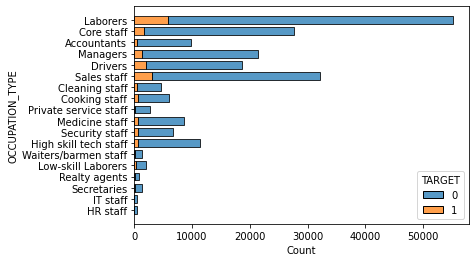

In [45]:
sns.histplot(reduced_app_train, y= "OCCUPATION_TYPE", hue= "TARGET", multiple= "stack", shrink= 0.7)

temp = pd.DataFrame(reduced_app_train.groupby("OCCUPATION_TYPE")["TARGET"].agg(lambda x: x.eq(1).sum())).reset_index()
temp['Total'] = pd.DataFrame(reduced_app_train.groupby("OCCUPATION_TYPE")["TARGET"].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(reduced_app_train.groupby("OCCUPATION_TYPE")["TARGET"].agg(Avg='mean')).reset_index()['Avg']
temp

Out of all the possible Occupation Types, the majority of applicants have not provided their Occupation Type in the application (approx. 31.39%) which is followed by Laborers (approx. 18%).
Out of all the occupations, Waiters/barmen staff are considered to be the least capable of repayment followed by Laborers -> though laborers have considerably higher applications as compared to Waiters/barmen staff.

**Univariate Analysis: EXT_SOURCE_1**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


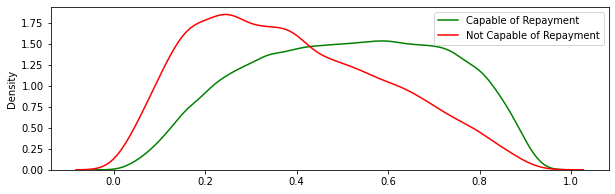

In [46]:
capable_ext_source_1 = reduced_app_train[reduced_app_train['TARGET']==0]['EXT_SOURCE_1'].values
not_capable_ext_source_1 = reduced_app_train[reduced_app_train['TARGET']==1]['EXT_SOURCE_1'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_1,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_1,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()

There is some considerable difference among the 2 classes, as we can see from the PDF plot. Therefore, ‘Ext_Source_1’ is going to be an important feature.

**Univariate Analysis: EXT_SOURCE_2**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


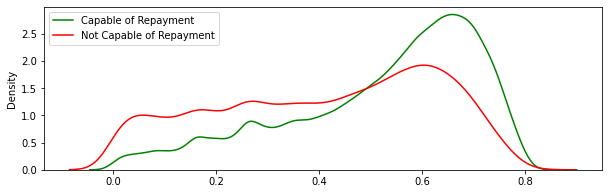

In [47]:
capable_ext_source_2 = reduced_app_train[reduced_app_train['TARGET']==0]['EXT_SOURCE_2'].values
not_capable_ext_source_2 = reduced_app_train[reduced_app_train['TARGET']==1]['EXT_SOURCE_2'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_2,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_2,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()

The data is reasonably well separated and hence this will also be an important feature.

**Univariate Analysis: EXT_SOURCE_3**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


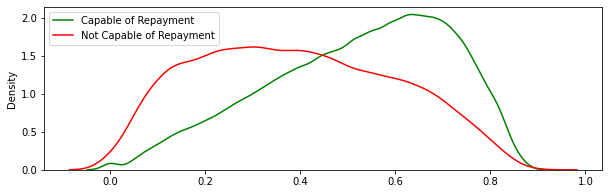

In [48]:
capable_ext_source_3 = reduced_app_train[reduced_app_train['TARGET']==0]['EXT_SOURCE_3'].values
not_capable_ext_source_3 = reduced_app_train[reduced_app_train['TARGET']==1]['EXT_SOURCE_3'].values
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_3,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_3,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()

The data is reasonably well separated and hence this will also be an important feature.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

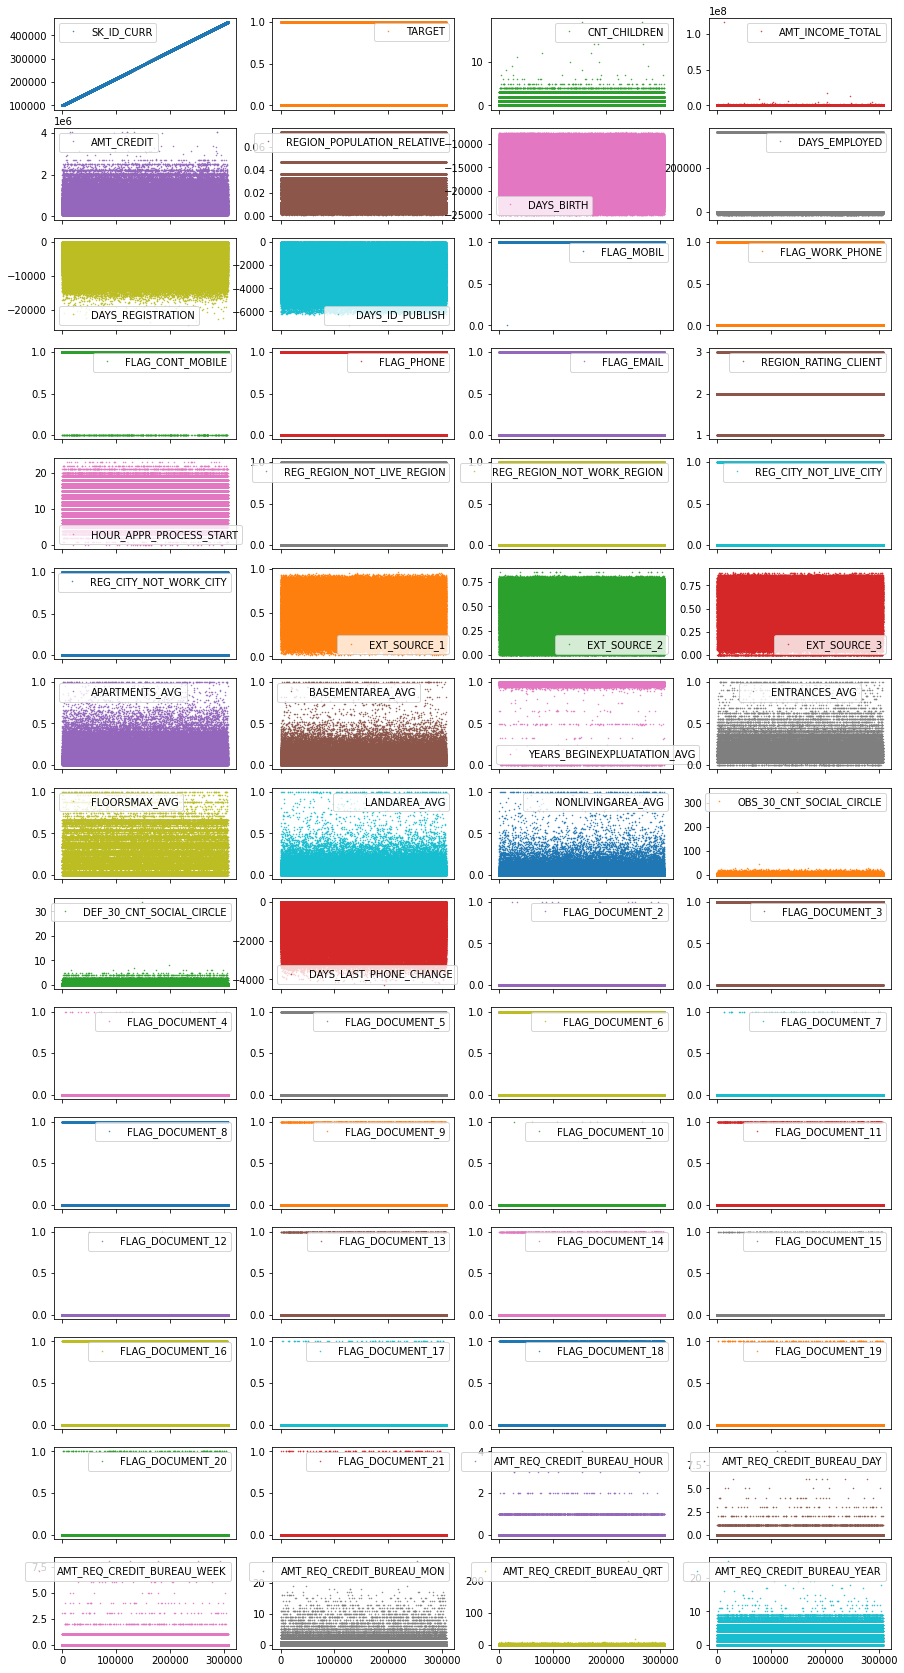

In [50]:
reduced_app_train.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
                        figsize=(15, 30), markersize=1)

We can see some unmeaningful variables so we'll drop them some of them

In [51]:
some_unmeaningful_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
                          'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                          'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                          'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                          'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                          'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                          'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
                          'CNT_CHILDREN']

In [53]:
reduced_app_train = reduced_app_train.drop(some_unmeaningful_cols, axis = 1)

In [54]:
fix_nulls(reduced_app_train)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002.0,1.0,Cash loans,M,N,Y,202500.0,406597.5,Unaccompanied,Working,...,0.068970,0.083313,0.036896,NaN,block of flats,"Stone, brick",No,2.0,2.0,-1134.0
1,100003.0,NaN,Cash loans,F,N,N,270000.0,1293502.5,Family,State servant,...,0.034485,0.291748,0.013000,0.009804,block of flats,Block,No,1.0,NaN,-828.0
2,100004.0,NaN,Revolving loans,M,Y,Y,67500.0,135000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-815.0
3,100006.0,NaN,Cash loans,F,N,Y,135000.0,312682.5,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,-617.0
4,100007.0,NaN,Cash loans,M,N,Y,121500.0,513000.0,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1106.0
